# ML Project - Bank Marketing Prediction

# Read in the file and get basic information about the data, including numerical summaries.

In [222]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [223]:
Data=pd.read_csv(r"D:\DS\ML\Project1\bank-marketing.csv")
Data

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [74]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [76]:
Data.shape

(45211, 19)

In [77]:
Data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [79]:
Data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

yes, there is definitely something fishy going on here, we can see that min value is -1 and 75% of the values are -1.

# Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [224]:
Data.drop(Data[Data['pdays'] < 0].index,inplace=True)

In [84]:
Data.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

# Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

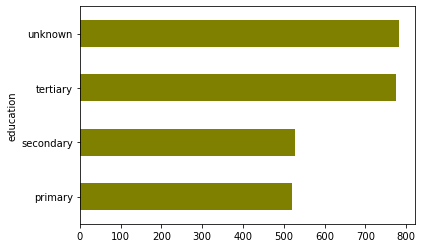

In [85]:
Data.groupby(['education'])['balance'].median().plot.barh(color="olive")
plt.show()

So Unknow group has highest median.

# Make a box plot for pdays. Do you see any outliers?

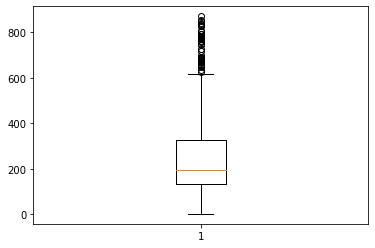

In [86]:
plt.boxplot(Data['pdays'])
plt.show()

# Bi-variate analysis 

# 1.Convert the response variable to a convenient form

In [87]:
Data.replace({'response': {"yes": 1,'no':0}},inplace=True) 

In [88]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8257 non-null   int64 
 1   job        8257 non-null   object
 2   salary     8257 non-null   int64 
 3   marital    8257 non-null   object
 4   education  8257 non-null   object
 5   targeted   8257 non-null   object
 6   default    8257 non-null   object
 7   balance    8257 non-null   int64 
 8   housing    8257 non-null   object
 9   loan       8257 non-null   object
 10  contact    8257 non-null   object
 11  day        8257 non-null   int64 
 12  month      8257 non-null   object
 13  duration   8257 non-null   int64 
 14  campaign   8257 non-null   int64 
 15  pdays      8257 non-null   int64 
 16  previous   8257 non-null   int64 
 17  poutcome   8257 non-null   object
 18  response   8257 non-null   int64 
dtypes: int64(9), object(10)
memory usage: 1.5+ MB


# Make suitable plots for associations with numerical features and categorical features’

In [89]:
all_cols = Data.columns
numerical_cols = Data._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

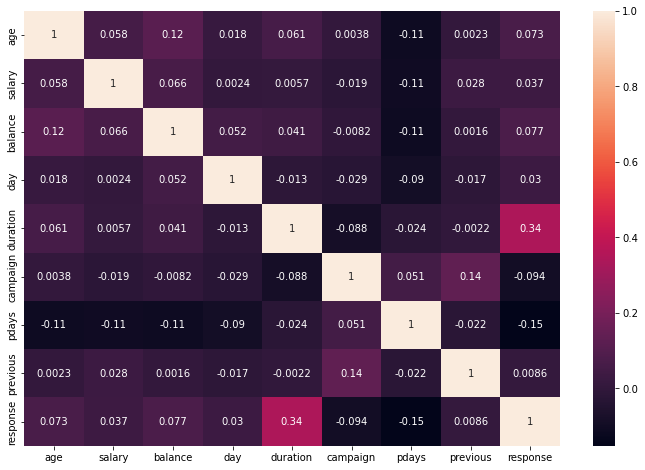

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(Data.corr(), annot=True);

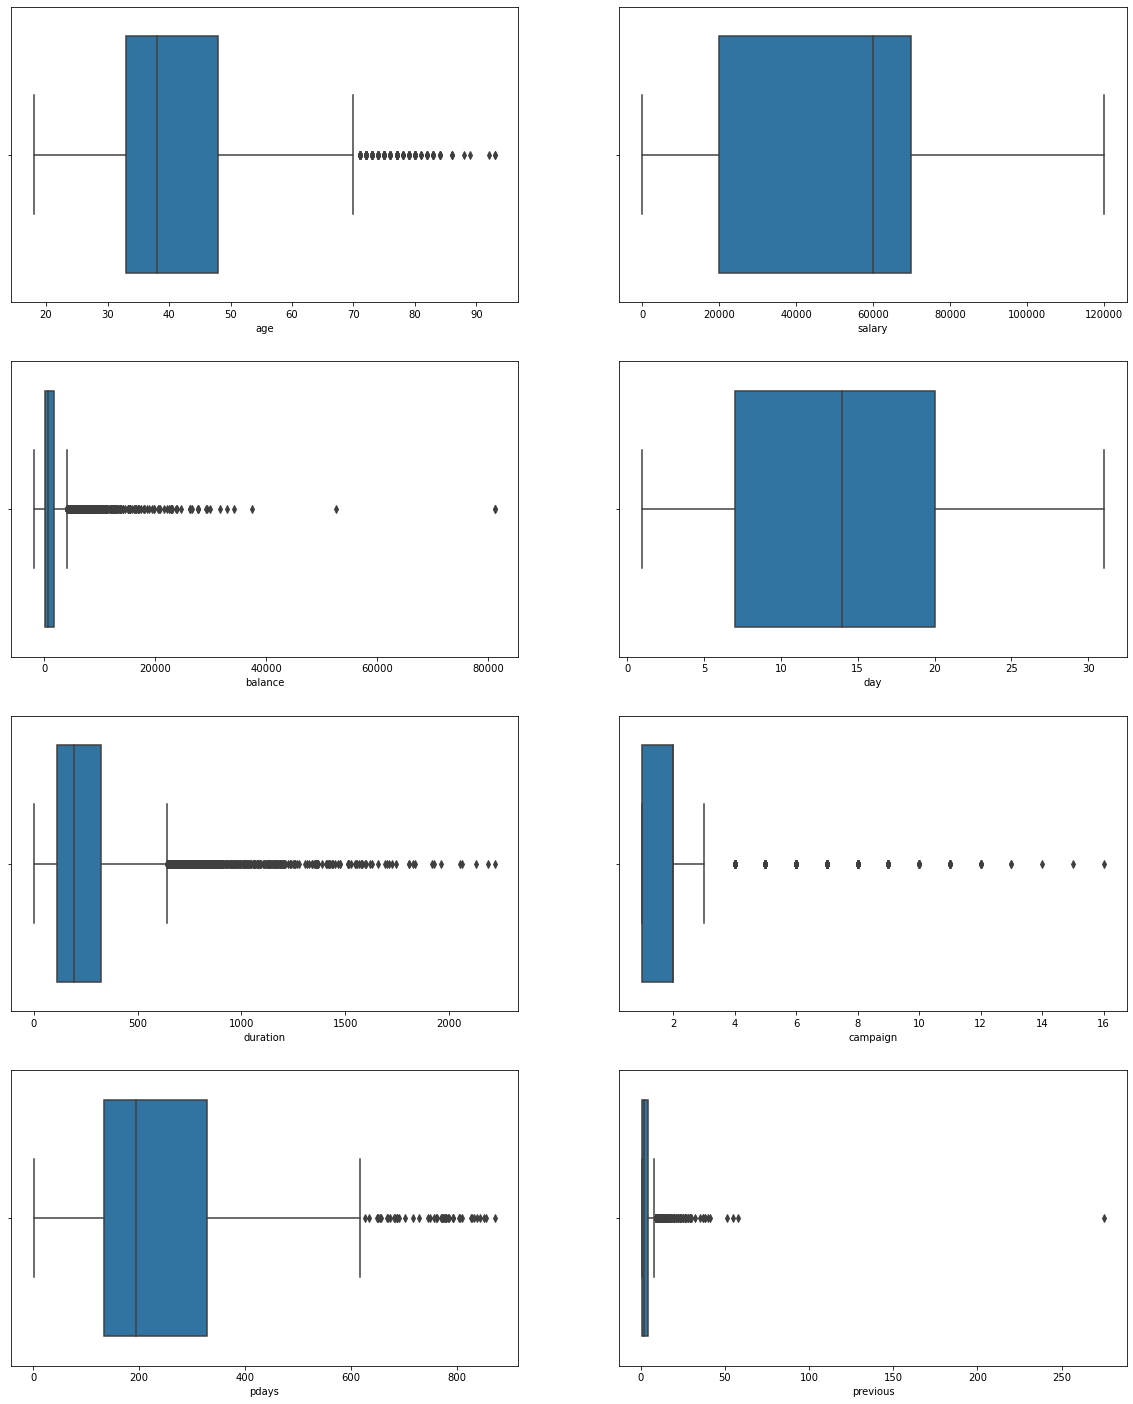

In [91]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, numerical_cols)):   
    if col != 'response':    
        sns.boxplot(col, data=Data, ax=ax)

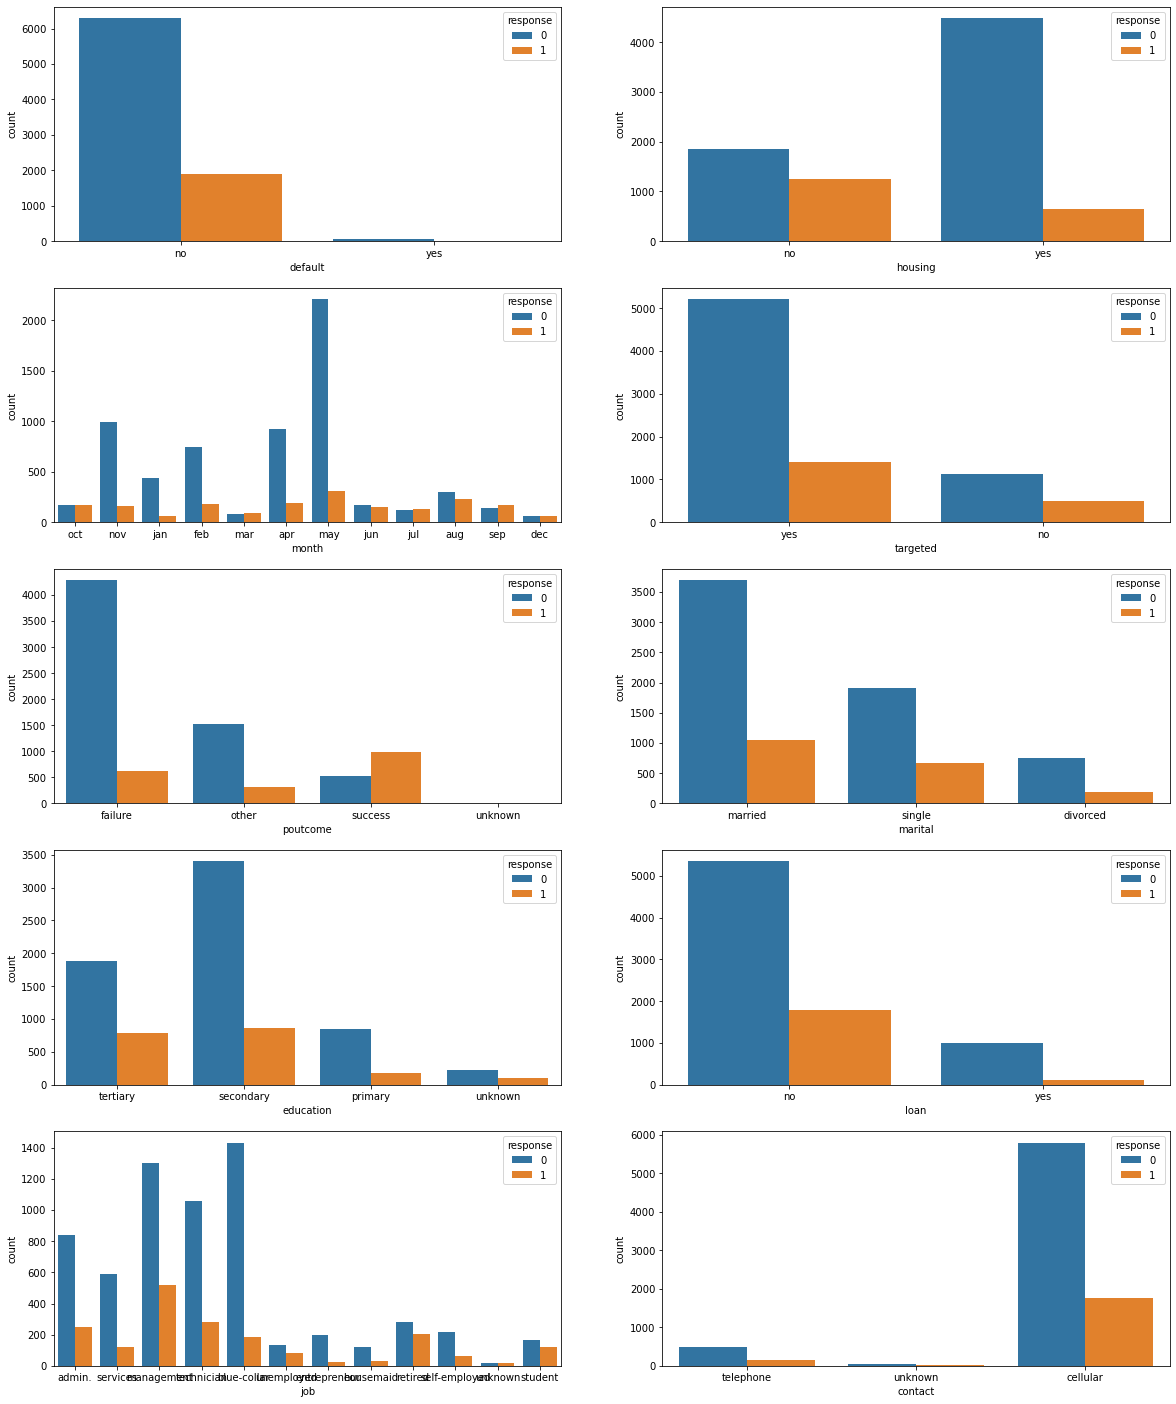

In [92]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.countplot(col, data=Data,hue=Data['response'], ax=ax)

# Are the features about the previous campaign data useful?

In [94]:
Data[numerical_cols].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

From the above, we can see previous columns is not highly corelated with the response variable. Higly corelated variable is duration here.

# Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

In [95]:
pd.crosstab(Data['pdays'],Data['poutcome'],values=Data['response'],aggfunc='count',normalize=True) 

poutcome,failure,other,success,unknown
pdays,,,,
1,0.000363,0.000363,0.001090,0.0
2,0.000121,0.004239,0.000121,0.0
3,0.000000,0.000121,0.000000,0.0
4,0.000121,0.000000,0.000121,0.0
5,0.000121,0.001090,0.000121,0.0
...,...,...,...,...
838,0.000000,0.000121,0.000000,0.0
842,0.000121,0.000000,0.000000,0.0
850,0.000121,0.000000,0.000000,0.0


yes, if the previous outcome is success there is a high chance to get successful response again, so i will use poutcome in my final model.

# Data Preprocessing

In [96]:
Data.poutcome.value_counts()

failure    4901
other      1840
success    1511
unknown       5
Name: poutcome, dtype: int64

In [97]:
Data_final = Data.copy(deep=True)

In [98]:
from sklearn.preprocessing import LabelEncoder
Data_final[categorical_cols] = Data[categorical_cols].apply(LabelEncoder().fit_transform)

In [99]:
Data_final.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


# Train-Test Split

In [225]:
from sklearn.model_selection import train_test_split
X = Data_final.drop('response',axis=1)
y = Data_final['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Logistic regression

# Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [247]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, classification_report

In [248]:
clf = LogisticRegression()

In [249]:
# Fitting algo for Training

clf.fit(X_train,y_train)

# Predict train result
pred_train=clf.predict(X_train)

# Predict test result
pred_test=clf.predict(X_test)

print('Training Accuracy: {}'.format(accuracy_score(y_train,pred_train)), "\n")
print('Test Accuracy: {}'.format(accuracy_score(y_test,pred_test)), "\n")

Training Accuracy: 0.7800657553209898 

Test Accuracy: 0.7836965294592413 



# RFE MODEL

In [250]:
rfe=RFE(clf)
rfe=rfe.fit(X,y)
rfe1 =X_train.columns[rfe.support_]
rfe1 

Index(['marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'campaign', 'poutcome'],
      dtype='object')

In [251]:
#After feature selection, again fitting logistic Regression Model and predicting the result.

# Fitting also for Training
clf.fit(X_train[X_train.columns[rfe.support_]],y_train)

# Predict train result
pred_train=clf.predict(X_train[X_train.columns[rfe.support_]])

# Predict test result
pred_test=clf.predict(X_test[X_test.columns[rfe.support_]])

print('Training Accuracy: {}'.format(accuracy_score(y_train,pred_train)), "\n")
print('Test Accuracy: {}'.format(accuracy_score(y_test,pred_test)), "\n")

Training Accuracy: 0.8158851012285863 

Test Accuracy: 0.817998385794996 



# Classification Matrix

In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1913
           1       0.67      0.40      0.50       565

    accuracy                           0.82      2478
   macro avg       0.75      0.67      0.70      2478
weighted avg       0.80      0.82      0.80      2478



In [253]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred_test)))

Model accuracy score with criterion gini index: 0.8180


In [254]:
def show_report(clf, y_test,pred_test): 
    print('Accuracy: ',accuracy_score(y_test,pred_test))
    print('================================')
    print('Precision: ',precision_score(y_test,pred_test))
    print('================================')
    print('Recall: ',recall_score(y_test,pred_test))
    print('================================')
    print('\nClassification Report\n')
    print(classification_report(y_test,pred_test))
    print('================================')
    print('\nconfusion_matrix\n')
    print(confusion_matrix(y_test,pred_test))
    print('================================')
    print('\ncross validation:',cross_val_score(clf, X, y, cv=5))

In [255]:
show_report(clf, y_test,pred_test)

Accuracy:  0.817998385794996
Precision:  0.6666666666666666
Recall:  0.40353982300884955

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1913
           1       0.67      0.40      0.50       565

    accuracy                           0.82      2478
   macro avg       0.75      0.67      0.70      2478
weighted avg       0.80      0.82      0.80      2478


confusion_matrix

[[1799  114]
 [ 337  228]]

cross validation: [0.79539952 0.66646489 0.77892187 0.7752877  0.75529982]


# VIF

In [256]:
def checkVIF(X):
    vif=pd.DataFrame()
    vif['features']=X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif  

In [257]:
checkVIF(X_train[X_train.columns[rfe.support_]])

,features,VIF
0,marital,3.89
2,targeted,3.39
1,education,3.28
4,housing,2.69
7,campaign,2.69
8,poutcome,1.66
5,loan,1.19
6,contact,1.09
3,default,1.01


# k fold cross validation

In [258]:
cross_val=cross_val_score(clf,X,y,cv=10,scoring="accuracy").mean()
cross_val

0.7679501063907843

# Most important Features from your Logistic regression model.

In [265]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(clf)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['age', 'day', 'month', 'duration', 'pdays'], dtype='object')

These are most important feature

# Predictive model 2: Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=48,max_depth=5)
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=48)

In [233]:
#defining y_pred_R variable.

y_pred_R = random_forest.predict(X_test)

# What is the precision, recall, accuracy of your model?

In [243]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_R)))

Model accuracy score with criterion gini index: 0.8499


In [235]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_R))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1913
           1       0.79      0.47      0.59       565

    accuracy                           0.85      2478
   macro avg       0.82      0.71      0.75      2478
weighted avg       0.84      0.85      0.83      2478



# K-Fold Cross Validation

In [242]:
#k-fold cross validation to validate data.
cross_val=cross_val_score(random_forest,X,y,cv=10,scoring="accuracy").mean()
cross_val

0.8209903881429306

# Feature Importance

['poutcome', 'duration', 'pdays', 'housing', 'month']


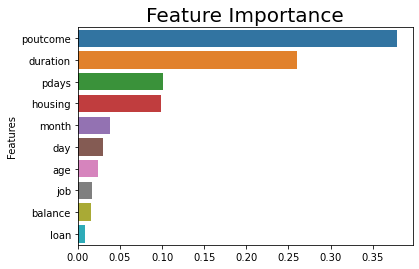

In [200]:
importances=random_forest.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

In [236]:
random_forest.fit(X_train[selected_features], y_train)
y_pred_rf2 = random_forest.predict(X_test[selected_features])

In [202]:
#calculating RFE.
from sklearn.feature_selection import RFE
rfe1 = RFE(random_forest,5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     n_estimators=48),
    n_features_to_select=5)

In [203]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'duration', 'pdays', 'poutcome'], dtype='object')

In [237]:
print(classification_report(y_test,y_pred_rf2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1913
           1       0.74      0.52      0.61       565

    accuracy                           0.85      2478
   macro avg       0.80      0.73      0.76      2478
weighted avg       0.84      0.85      0.84      2478



In [238]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test,y_pred_rf2)))

Model accuracy score with criterion gini index: 0.8483


In [240]:
def show_report(random_forest, y_test,y_pred_rf2): 
    print('Accuracy: ',accuracy_score(y_test,y_pred_rf2))
    print('================================')
    print('Precision: ',precision_score(y_test,y_pred_rf2))
    print('================================')
    print('Recall: ',recall_score(y_test,y_pred_rf2))
    print('================================')
    print('\nClassification Report\n')
    print(classification_report(y_test,y_pred_rf2))
    print('================================')
    print('\nconfusion_matrix\n')
    print(confusion_matrix(y_test,y_pred_rf2))
    print('================================')
    print('\ncross validation:',cross_val_score(clf, X, y, cv=5))

In [241]:
show_report(random_forest, y_test,y_pred_rf2)

Accuracy:  0.8482647296206618
Precision:  0.7356608478802993
Recall:  0.5221238938053098

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1913
           1       0.74      0.52      0.61       565

    accuracy                           0.85      2478
   macro avg       0.80      0.73      0.76      2478
weighted avg       0.84      0.85      0.84      2478


confusion_matrix

[[1807  106]
 [ 270  295]]

cross validation: [0.79539952 0.66646489 0.77892187 0.7752877  0.75529982]


# Which metric did you choose and why?

We use classification report metrics because in it we have parameters like precision score,accuracy,recall score.

# Which model has better performance on the test set?

In [261]:
print('Logistic Regression\n')
show_report(clf, y_test,pred_test)
print('\n')
print('='*100)
print('='*100)
print('\nRandom Forest Classifier\n')
show_report(random_forest, y_test,y_pred_rf2)

Logistic Regression

Accuracy:  0.817998385794996
Precision:  0.6666666666666666
Recall:  0.40353982300884955

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1913
           1       0.67      0.40      0.50       565

    accuracy                           0.82      2478
   macro avg       0.75      0.67      0.70      2478
weighted avg       0.80      0.82      0.80      2478


confusion_matrix

[[1799  114]
 [ 337  228]]

cross validation: [0.79539952 0.66646489 0.77892187 0.7752877  0.75529982]



Random Forest Classifier

Accuracy:  0.8482647296206618
Precision:  0.7356608478802993
Recall:  0.5221238938053098

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1913
           1       0.74      0.52      0.61       565

    accuracy                           0.85      2478
   macro avg       0.80      0.73      0.76      2478
wei

* Random forest has got better accuracy score ie.84% as compared to logistic regression i.e.81%.
* Hence we can say that Random Forest has better performance.

# Compare the feature importance from the different models – do they agree?

#### From Logistic regression important features we got are-

* age
* day
* month
* duration
* pdays

#### From Random Forest important features we got are-
* Housing
* month
* poutcome
* duration 
* pdays

# Are the top features similar in both models?

Yes, from above description we can say we have one similar feature which is
* pdays

# Project END